# Rew's notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib.ticker import StrMethodFormatter

In [ ]:
!pwd

In [ ]:
!ls ..

In [ ]:
con = sqlite3.connect("../im.db")
con

In [2]:
schema = pd.read_sql("SELECT * FROM sqlite_master", con)

NameError: name 'con' is not defined

In [ ]:
schema

Assigning our data to variables

In [212]:
TMDBmovies = pd.read_csv("../zippedData/tmdb.movies.csv.gz")

In [218]:
Movie_budget = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")

In [144]:
Movie_gross = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")

In [3]:
Movie_info = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', sep='\t')

In [7]:
reviews = pd.read_csv('../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_2' )

In [213]:
TMDBmovies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [219]:
Movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [235]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [236]:
Movie_gross['year'].head(1723).unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [237]:
new_table = TMDBmovies.merge(Movie_gross)

In [238]:
new_table = new_table.drop(columns=['id','original_language','original_title','popularity','release_date','title','vote_average','vote_count','studio','domestic_gross','foreign_gross','year'])


In [239]:
new_table

,Unnamed: 0,genre_ids,total_rev
0,1,"[14, 12, 16, 10751]",4.949000e+08
1,2,"[12, 28, 878]",6.239000e+08
2,4,"[28, 878, 12]",8.283000e+08
3,7,"[16, 10751, 35]",1.067000e+09
4,8,"[16, 10751, 35]",5.431000e+08
...,...,...,...
1718,24335,"[12, 80, 10751, 35]",3.920000e+07
1719,24465,"[35, 10749, 18, 9648]",8.284700e+07
1720,24494,"[12, 35, 14]",3.617060e+08
1721,24646,"[18, 10749]",3.300000e+06


In [240]:
new_table['genre_ids'] = new_table['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [241]:
new_table = new_table.explode('genre_ids')

In [242]:
new_table

,Unnamed: 0,genre_ids,total_rev
0,1,14,494900000.0
0,1,12,494900000.0
0,1,16,494900000.0
0,1,10751,494900000.0
1,2,12,623900000.0
...,...,...,...
1721,24646,18,3300000.0
1721,24646,10749,3300000.0
1722,25148,28,2191000.0
1722,25148,12,2191000.0


In [243]:
new_table['genre_ids'].value_counts()

18       851
35       559
28       429
53       418
12       309
10749    249
80       214
878      184
14       177
10751    176
27       158
9648     135
16       131
36        88
99        68
10402     53
10752     46
37        19
          13
10770      2
Name: genre_ids, dtype: int64

In [244]:
new_table["genre_ids"].map

<bound method Series.map of 0          14
0          12
0          16
0       10751
1          12
        ...  
1721       18
1721    10749
1722       28
1722       12
1722       16
Name: genre_ids, Length: 4279, dtype: object>

In [245]:
MVG_dict = {'28' : 'Action', '12' :'Adventure', '16' : "Animation", '10751' : "Family", '35' : "Comedy", '80' : "Crime", '99' : "Documentary", 
           "18" : "Drama", "14" : "Fantasy", "36" : "History", '27' : "Horror", '10402' : "Music", '9648' : "Mystery", '10749' : "Romance",
           '878' : "Scifi", '10770' : "TV Movie", '53' : "Thriller", '10752' : "Western", '37' : "War"}

In [246]:
for key in MVG_dict:
    print(key)

28
12
16
10751
35
80
99
18
14
36
27
10402
9648
10749
878
10770
53
10752
37


In [247]:
for key,val in MVG_dict.items():
    print(key, val)

28 Action
12 Adventure
16 Animation
10751 Family
35 Comedy
80 Crime
99 Documentary
18 Drama
14 Fantasy
36 History
27 Horror
10402 Music
9648 Mystery
10749 Romance
878 Scifi
10770 TV Movie
53 Thriller
10752 Western
37 War


In [248]:
new_table['genre_ids'] = new_table["genre_ids"].map(MVG_dict)

In [249]:
new_table.dropna(subset= ['genre_ids'])

,Unnamed: 0,genre_ids,total_rev
0,1,Fantasy,494900000.0
0,1,Adventure,494900000.0
0,1,Animation,494900000.0
0,1,Family,494900000.0
1,2,Adventure,623900000.0
...,...,...,...
1721,24646,Drama,3300000.0
1721,24646,Romance,3300000.0
1722,25148,Action,2191000.0
1722,25148,Adventure,2191000.0


In [250]:
T = new_table["genre_ids"].value_counts()

In [251]:
T

Drama          851
Comedy         559
Action         429
Thriller       418
Adventure      309
Romance        249
Crime          214
Scifi          184
Fantasy        177
Family         176
Horror         158
Mystery        135
Animation      131
History         88
Documentary     68
Music           53
Western         46
War             19
TV Movie         2
Name: genre_ids, dtype: int64

In [254]:
use_this

genre_ids
Documentary    3.410941e+07
History        7.056081e+07
Romance        7.257466e+07
Drama          7.727494e+07
Music          8.334165e+07
Mystery        8.935239e+07
Horror         9.210092e+07
Crime          1.047328e+08
Thriller       1.111222e+08
TV Movie       1.209500e+08
Western        1.384082e+08
Comedy         1.410837e+08
War            1.589017e+08
Action         2.654744e+08
Family         2.855180e+08
Fantasy        3.094006e+08
Scifi          3.127972e+08
Animation      3.417592e+08
Adventure      3.697909e+08
Name: total_rev, dtype: float64

In [253]:
use_this = new_table.groupby('genre_ids')['total_rev'].mean().sort_values(ascending=True)

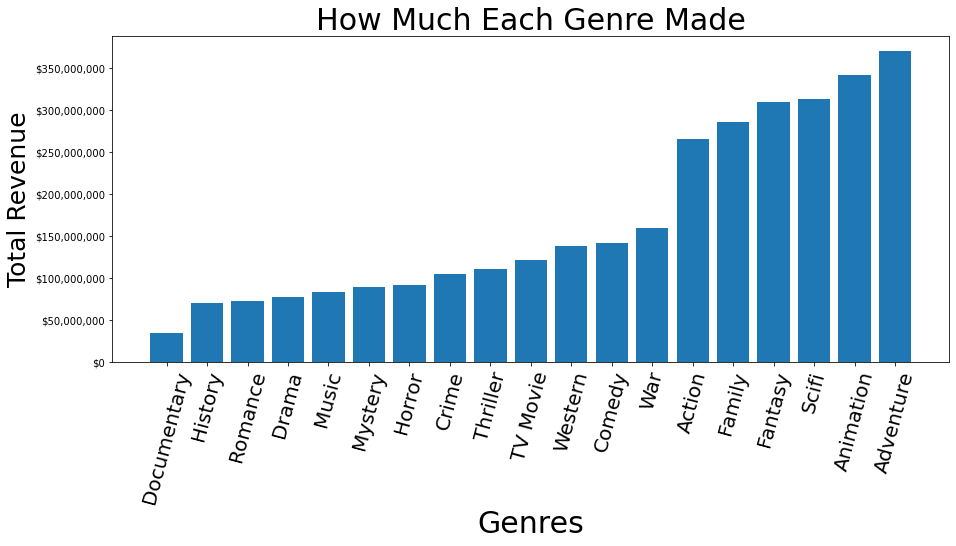

In [265]:
fig, ax = plt.subplots(figsize=(15, 6))

y = use_this
x = use_this.index

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.bar(x, y)
ax.set_title('How Much Each Genre Made', fontsize=30)
ax.tick_params(axis="x", labelsize = 20)
ax.set_xlabel("Genres", fontsize = 30)
ax.set_ylabel("Total Revenue", fontsize = 25)
plt.xticks(rotation = 75);

## In the cells below this:
- Made a new colunm that has the total revenue for each movie
- Made a graph that shows the trend between the studios and how much money they make

In [155]:
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].str.replace(',',"")

In [156]:
Movie_gross = Movie_gross.dropna(subset=['foreign_gross'])

In [157]:
MV = Movie_gross['foreign_gross'].astype(float)

In [158]:
MV

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2037, dtype: float64

In [159]:
Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']

<ipython-input-159-a34aef249568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']


In [181]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [182]:
mean = Movie_gross['total_rev'].mean()

In [183]:
std = Movie_gross['total_rev'].std()

In [197]:
studios = Movie_gross.groupby('studio')['total_rev'].mean().sort_values(ascending=True)[50:65]

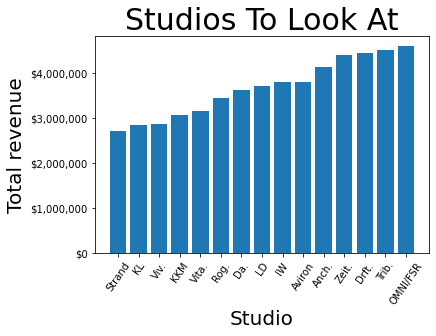

In [203]:
fig, ax = plt.subplots()
ax.bar(studios.index, studios)

plt.xticks(rotation=55)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Studios To Look At', fontsize= 30 )
ax.set_xlabel('Studio', fontsize= 20)
ax.set_ylabel('Total revenue', fontsize= 20 );



In [5]:
Movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [131]:
info = Movie_info.drop(columns=['id','synopsis','rating','genre','director','writer','theater_date','dvd_date','currency'])

# FILLED NULLS WITH 0

In [132]:
info['box_office'] = info['box_office'].fillna('0')

In [133]:
#got rid of ","
info['box_office'] = info['box_office'].str.replace(',','')

In [134]:
#made all the values of this column integers
info['box_office'] = info['box_office'].astype('int64')

In [135]:
type(info['box_office'][0])

numpy.int64

In [136]:
#sorted the values of thos column from greatest to least
info = info.sort_values('box_office', ascending=False)



In [137]:
info['runtime'] = info['runtime'].str.replace(' minutes',' ')

In [138]:
info.dropna(subset=['runtime'], inplace=True)


In [139]:
info['runtime'].unique()

array(['127 ', '170 ', '145 ', '118 ', '161 ', '95 ', '117 ', '92 ',
       '134 ', '131 ', '97 ', '120 ', '108 ', '123 ', '129 ', '91 ',
       '115 ', '111 ', '122 ', '166 ', '90 ', '107 ', '113 ', '96 ',
       '85 ', '103 ', '157 ', '119 ', '89 ', '102 ', '83 ', '98 ', '137 ',
       '93 ', '132 ', '99 ', '133 ', '109 ', '100 ', '126 ', '121 ',
       '124 ', '136 ', '86 ', '84 ', '105 ', '94 ', '15 ', '110 ', '130 ',
       '125 ', '101 ', '114 ', '82 ', '116 ', '106 ', '104 ', '88 ',
       '138 ', '112 ', '148 ', '67 ', '59 ', '87 ', '229 ', '80 ', '76 ',
       '128 ', '159 ', '70 ', '73 ', '81 ', '188 ', '141 ', '142 ',
       '139 ', '79 ', '69 ', '294 ', '180 ', '60 ', '135 ', '30 ', '10 ',
       '75 ', '68 ', '57 ', '205 ', '144 ', '143 ', '149 ', '240 ',
       '175 ', '178 ', '11 ', '77 ', '58 ', '140 ', '72 ', '5 ', '74 ',
       '147 ', '155 ', '78 ', '158 ', '290 ', '183 ', '71 ', '196 ',
       '195 ', '150 ', '56 ', '179 ', '146 ', '52 ', '7 ', '13 ', '45 ',
       

In [140]:
info['runtime'] = info['runtime'].astype('int64')

array(['$', nan], dtype=object)

In [141]:
info

,box_office,runtime,studio
827,368000000,127,Newmarket Film Group
877,303001229,170,Warner Bros.
1188,299300000,145,MGM
690,279167575,118,Universal Pictures
1117,261835892,161,Warner Bros. Pictures
...,...,...,...
575,0,94,NaN
574,0,100,Freestyle Releasing
572,0,92,NaN
571,0,99,NaN


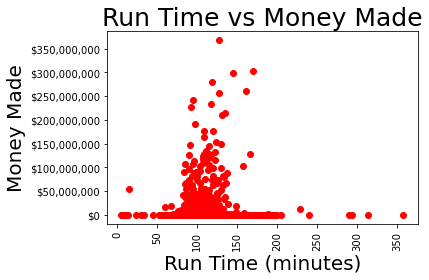

In [209]:
fig, ax = plt.subplots()

# These are all arguments that go in the plot's function
ax.scatter(info['runtime'], info['box_office'],
           c='red')

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.set_xlabel('Run Time (minutes)', fontsize=20)
ax.set_ylabel('Money Made', fontsize=20)
ax.set_title('Run Time vs Money Made', fontsize=25)
plt.xticks(rotation=90)

plt.tight_layout()

Which genre is most common? Drama
What studios could Microsoft buy? 





What can we ask about this data......
Which ones go together? (total_rev, genre, )
Metrics?
Differences in genres?
Just 1 genere or more than 1?
What can you do to make these movies?
Are we worried about domestic or forgien or both?

Before what year should we exclude movies?
How long of a movies should we concider?
Do the second installments of movies make more money? (ex Star Wars)



-Join SQL movie tables
-Get names of all columns
-Only movies that make more that 100 million dollars
-What movies get the most amount of views
-Only movies made after 2009
-See which movies have sequels
-